## Ønsketimen: feilsøking, dokumentasjon, for-løkker og scatterplot

Denne oppgaven er dedikert til ting NAT624-studentene ønsket å se på den siste dagen av kurset: *feilsøking*, bruk av *dokumentsjon*, *løkker* og en (nesten) ny type figur, *scatterplot*. 

Vi bruker tid spesifikt på **feilsøking** og å bruke **dokumentasjon** fordi dette er en av de siste kursdagene vi har, og dette er to ting det er veldig nyttig å være litt trygg på når dere skal bruke programmering i Python på egenhånd seinere. I denne biten er det flere deloppgaver med feil i som dere skal finne. I andre deloppgaver i denne biten må dere google dere frem for å løse en oppgave. 

**Løkker** beskriver mange forskjellige operasjoner. Vi skal først og fremst se på **for-løkker**. Det heter for-løkker fordi syntaksen er "for disse scenarioene, gjør dette". Dette er praktisk når man skal gjøre nesten det samme mange ganger, f.eks. hvis vi skal finne trendlinjen til hver 20-årsperiode til en tidsserie. Eller plotte alle disse trendlinjene. Eller beregne gjennomsnittet til perioden. Vi ser også så vidt på **if-løkker**: "hvis dette er tilfellet, gjør dette", f.eks., "hvis verdien er større enn 1000, skriv ut verdien". 

**Scatterplot** bruker vi tid på fordi dette er en enkel og veldig beskrivende metode for å se etter sammenhenger mellom to eller tre variabler. Flere av NAT624-studentene sammenlignet hverandres datasett og værmeldingen sine data i innleveringene sine. Noen av sammenlignet også med datasett over andre variabler enn temperatur, lastet ned fra f.eks. seklima.met.no. Å sammenligne to tidsserier kan gi mye informasjon, men scatterplot konsenterer sammenhenger på en litt annen måte som kan være nyttig. 

---------------

## Del 1: Feilsøking og bruk av dokumentasjon

In [2]:
import numpy as np # for regneoperasjoner
import matplotlib.pyplot as plt # for figurer

import sys
# Bytt ut stien under slik at den peker på hvor på din PC du har 
# lagret mappen "Funksjoner".
sys.path.append(r"W:\Work\Documents\EkteData\EkteData\Funksjoner")
from EkteDataFunk import loadData # for filinnlasting

In [3]:
file='TempBergenYearlyNonan.txt'
temp,tid = loadData(file)

In [4]:
tid.shape, np.squeeze(temp).shape

((160,), (160,))

In [5]:
temp=np.squeeze(temp)

Plottingen av figuren under ser litt annerledes ut enn slik vi har plottet figurer tidligere, men forskjellene er egentlig veldig små. Hovedforskjellen er at vi først definerer aksene vi plotter i og kaller dem `ax`. Dette er lignende noen av figurene vi lagde i [Del 5](https://github.com/irendundas/EkteData/blob/main/NAT624/Del5_sol_temp_nedb%C3%B8r.ipynb). Dette er praktisk hvis man f.eks. vil ha to y-akser som i Del 5, eller flere panel, men også som i figuren under: i stedet for å skrive fem linjer som starter `plt.title, plt.xlabel, plt.(...)` kan man skrive `ax.set()` og definere alt av tittel, aksenavn etc inni samme parantes. Det ser ryddigere ut. Men resultatet er det samme. 

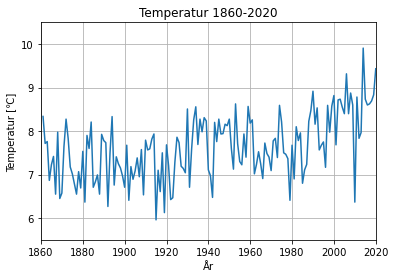

In [6]:
ax=plt.axes() # Lag akser å plotte i

# Plot tidsserien
ax.plot(tid, temp)

# Definer grid, tekst etc.
ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', 
    xlim=[1860,2020], # Sett grense for x-aksen
    ylim=[5.5,10.5] # Sett grense for y-aksen
) # Sett grense for y-aksen
ax.grid() # Legg til rutenett (grid) i bakgrunnen
plt.show() 

Finn gjennomsnittstemperaturen til hele perioden

In [7]:
# tips: np.mean()


Finn standardavviket til hele perioden

In [8]:
# tips: google "numpy standard deviation"


Finn indeksen til år 1900. Sjekk at du har riktig indeks ved å skrive ut verdien på denne indeksen i tidsvektoren.

In [9]:
# tips1: husk funksjonen np.where(). 
# tips2: husk at vi har brukt denne funksjonen før. Du kan altså enten bruke 
# google til å finne dokumentasjonen på hvordan denne funksjonen brukes ELLER 
# du kan finne filen der du jobbet med dette tidligere og se hva du gjorde da.


Lag en figur som viser temperatur fra år 1900 til slutten av tidsperioden. Bruk dokumentasjonen til matplotlib.pyplot til å velge linjefarge, markør og markørfarger. 

In [10]:
# tips: Nedbørsoppgaven_del3_plotting_av_tidsserier


I figuren under har jeg lagt til "minor" grid-linjer og spesifisert farge, linjestil og gjennomsiktighet. Gjør de små grid-linjene oransje og gjør hoved-grid-linjene tykkere. 

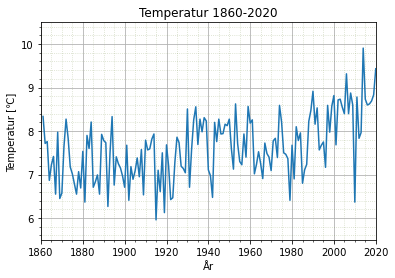

In [11]:
ax=plt.axes()

ax.plot(tid, temp)

ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', 
    xlim=[1860,2020], 
    ylim=[5.5,10.5]
) 
ax.minorticks_on()
ax.grid(which='minor', color=[.4, .5, .2], alpha=.3, linestyle=':') 
ax.grid(which='major', linestyle='-') 

plt.show() 

Hva er feil med kodecellen under? Svaret finnes i feilmeldingen under. 
Tips: husk at den mest nyttige informasjonen i en feilmelding sjelden finnes midt i feilmeldingen. 

In [12]:
ax=plt.axes()

ax.plot(tid, temp)

ax.set(
    title='Temperatur 1860-2020',
    xlabel='År',
    ylabel='Temperatur [\u2103]', 
    xlim=[1860,2020], 
    ylim=[5.5,10.5]
) 
ax.minorticks_on()
ax.grid(which='minor', color=[.4, .5, 2], alpha=.3, linestyle=':') 
ax.grid(which='major', linestyle='-') 

plt.show() 

ValueError: RGBA values should be within 0-1 range

<Figure size 432x288 with 1 Axes>

Under finner jeg indeksene som deler tidsperioden inn i fire like deler. Men det blir feil når jeg prøver å bruke resultatet til å indeksere tid (for å sjekke at det funket). Hvorfor blir det feil?

In [13]:
indeks=[
    0, 
    len(tid)*1/4, 
    len(tid)*2/4, 
    len(tid)*3/4,
    len(tid)
]

tid[indeks]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [14]:
int(indeks[3])

120

In [15]:
# Hva om jeg vil konvertere alle elementene i "indeks" til integers?
# Dette går ikke
int(indeks)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'list'

In [19]:
# En verdi av ganger funker
indeks[3]=int(indeks[3])
indeks

[0, 40, 80, 120, 160]

In [20]:
# Dette går, men det er ganske tungvindt. 
# Hva om "indeks" var 20 elementer lang?
indeks[1]=int(indeks[1])
indeks[2]=int(indeks[2])
indeks[3]=int(indeks[3])
indeks[4]=int(indeks[4])

In [18]:
indeks

[0, 40, 80, 120, 160]

## Del 2: For-løkker

Vi tar utgangspunkt i problemet over (å finne indeksene som deler tidsperioden vår inn i fire like deler) til å introdusere **for-løkker**.

Den letteste måten å endre alle elementene i vektoren `indeks` til integers er ved hjelp av en **for-løkke**. Dette er nyttig når man skal gjøre samme operasjon flere ganger. 

*Det finnes en hel oppgave om for-løkker i Ekte Data-filene:* [Nedbørsoppgaven_Del5_forløkke.ipynb](https://github.com/irendundas/EkteData/blob/main/Nedb%C3%B8rsoppgaven/Del5_Forl%C3%B8kke.ipynb)

Aller først et par enkle eksempler:

In [23]:
for ind in range(6): # range(6) er alle heltall fra 0 til 5 (6 heltall)
    print(ind)

0
1
2
3
4
5


In [24]:
list(range(6))

[0, 1, 2, 3, 4, 5]

Prøv med ekte data:

In [25]:
file='TempBergenYearlyNonan.txt'
temp,tid = loadData(file)
temp=np.squeeze(temp)

In [27]:
# Skriv ut de 6 første verdiene i "temp"
for i in range(6):
    print(temp[i])

8.336363636363636
7.716666666666666
7.758333333333334
6.866666666666667
7.2250000000000005
7.416666666666668


In [29]:
# Sjekk at det stemmer:
temp[:6]

array([8.33636364, 7.71666667, 7.75833333, 6.86666667, 7.225     ,
       7.41666667])

In [30]:
# for hver indeks [0,1,2,3] print ut temperaturen pluss temperaturen på 
# neste indeks
for k in range(4):
    print(temp[k]+temp[k+1])

16.0530303030303
15.475
14.625
14.091666666666669


In [32]:
# Sjekk at det stemmer:
print(temp[0]+temp[0+1])
print(temp[1]+temp[1+1])
print(temp[2]+temp[2+1])
print(temp[3]+temp[3+1])

16.0530303030303
15.475
14.625
14.091666666666669


## Del 2 opggave 1
Bruk en for-løkke til å printe ut temperatur + gjennomsnittstemperatur til de 10 første temperatur-verdiene

**Tilbake til problemstillingen med indeksene:**

Vi lager "indeks" på nytt og konverterer alle elementene til integers ved hjelp av en for-løkke

In [33]:
indeks=[
    0, 
    len(tid)*1/4, 
    len(tid)*2/4, 
    len(tid)*3/4,
    len(tid)
]
indeks

[0, 40.0, 80.0, 120.0, 160]

In [34]:
int(indeks[2])

80

for-løkker gjør en operasjon mange ganger etter hverandre. Hvor mange ganger bestemmes i den første linjen: `for i in range(5)` betyr feks at operasjonen skal gjøres fem ganger. `range(5)` iterer fra 0 til og med 4, altså 5 iterasjoner. `i` blir da `0` i første iterasjon, `1` i neste iterasjon osv. 

In [35]:
for i in range(len(indeks)):
    indeks[i]=int(indeks[i])
    print('i=',i,', indeks[i]=',indeks[i])

indeks

i= 0 , indeks[i]= 0
i= 1 , indeks[i]= 40
i= 2 , indeks[i]= 80
i= 3 , indeks[i]= 120
i= 4 , indeks[i]= 160


[0, 40, 80, 120, 160]

Nå kan vi f.eks. sammelingne de fire 40-årsperiodene ved å beregne gjennomsnittstemperaturen i hver periode.

In [37]:
for i in range(4):
    mean=np.mean(temp[indeks[i]:indeks[i+1]])
    print('Gj.snitt temp for periode nr.', i, '=', np.round(mean,2))

Gj.snitt temp for periode nr. 0 = 7.26
Gj.snitt temp for periode nr. 1 = 7.37
Gj.snitt temp for periode nr. 2 = 7.65
Gj.snitt temp for periode nr. 3 = 8.23


Gjennomsnittstemperaturen for den siste 40-årsperioden er en hel grad varmere enn gjennomsnittstemperaturen for den første 40-årsperioden.

Vi kan også sammenligne de fire 40-årsperiodene ved å se på en figur:

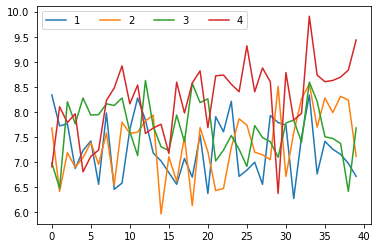

In [38]:
plt.plot(temp[indeks[0]:indeks[1]], label='1')
plt.plot(temp[indeks[1]:indeks[2]], label='2')
plt.plot(temp[indeks[2]:indeks[3]], label='3')
plt.plot(temp[indeks[3]:indeks[4]], label='4')
plt.legend(ncol=4)
plt.show()

Dette kan vi også gjøre med en for-løkke, så slipper vi så mange nesten like kodelinjer:

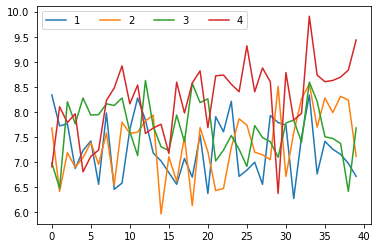

In [39]:
for i in range(4):
    plt.plot(temp[indeks[i]:indeks[i+1]], label=str(i+1))
plt.legend(ncol=4)
plt.show()


Fordelen med for-løkker er at man slipper å skrive så mange nesten helt like kode-linjer. 

I eksemplene over har vi brukt `for in in range(x)`. Da er `i` indeksen til hver iterasjon. Men man kan også la `i` være faktiske verdier slik som under:

In [43]:
for val in indeks: 
    print(val)

# Sjekk at det er det samme:
indeks

0
40
80
120
160


[0, 40, 80, 120, 160]

Ved å bruke dette kan man gjøre for-løkken for plotting en del penere:

In [44]:
diff=int(len(tid)/4) # Fordi vi vet at vi har delt tidsserien inn i fire like deler
diff

40

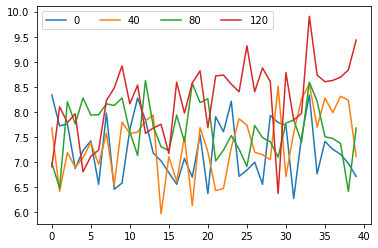

In [45]:
for ind in indeks[:-1]:
    plt.plot(temp[ind:ind+diff], label=str(ind))
plt.legend(ncol=4)
plt.show()

## Del 2, oppgave 2
- Bruk en forløkke til å dele tidsserien inn i 5 like lange deler.
- Bruk er for-løkke til å plotte alle de 5 periodene i samme figur. 

I blant trenger man **både** en faktisk verdi **og** indeksen. Da kan man bruke `enumerate` istedet for `range`:

In [49]:
for count, val in enumerate(indeks):
    print('count:', count, 'val:', val)

count: 0 val: 0
count: 1 val: 32.0
count: 2 val: 64.0
count: 3 val: 96.0
count: 4 val: 128.0
count: 5 val: 160


Ved å bruke dette kan man gjøre begge de to siste stegene vi har gjort over (1: konvertere til integers og 2: plotte) inne i samme løkke. 

In [50]:
indeks=[
    0, 
    len(tid)*1/4, 
    len(tid)*2/4, 
    len(tid)*3/4,
    len(tid)
]
indeks

[0, 40.0, 80.0, 120.0, 160]

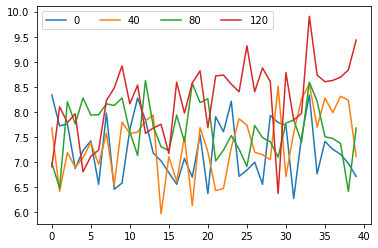

In [51]:
for count, val in enumerate(indeks[:-1]):
    ind=int(val) # konverter indeksen til integer
    plt.plot(temp[ind:ind+diff], label=str(ind))

plt.legend(ncol=4)
plt.show()    


For å gjøre poenget med for-løkker enda tydeligere: Hva om vi vil beregne gjennomsnitt og standardavvik for ti-årsperiode, og så lage en figur over alle disse punktene?

In [52]:
# lag ny indekseringsvektor: 
diff=10 # Fordi vi vet at vi vil se på tiårsperioder

# Vi bruker np.arange fordi vi vet tidssteget vi vil ha
# syntaksen er: np.arange(start, stop, step)
indeks=np.arange(0, len(tid), diff) 
indeks

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150])

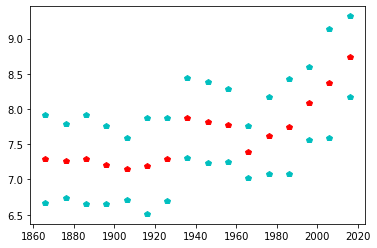

In [55]:
for count, val in enumerate(indeks):
    # Når f.eks. val=30 blir linjen under: np.mean(temp[30:30+10]), som er 
    # tiårsperiode nr 4. 
    mean=np.mean(temp[val:val+diff]) 
    std=np.std(temp[val:val+diff])
    
    # Vi vil plotte punktene midt i perioden de representerer. Derfor finner vi
    # verdien til "tid" ikke ved f.eks. 30 eller 40, men på indeks nr 35. 
    tid_mean=tid[int(val+diff/2)] 

    
    plt.plot(tid_mean, mean, 'rp')
    plt.plot(tid_mean, mean+std, 'cp')
    plt.plot(tid_mean, mean-std, 'cp')

Det ville vært lettere å se på denne figuren om det var linjer mellom punktene. For å få det til må vi lagre verdiene til `mean` og `std` i egne vektorer slik at vi kan plotte dem i sin helhet etter at vi har beregnet alle. 

In [56]:
# Lag to vektorer som kan fylles med verdier: 
# En for gjennomsnitt og en for std. 
mean=np.zeros(len(indeks))
std=np.zeros(len(indeks))
tid_mean=np.zeros(len(indeks))

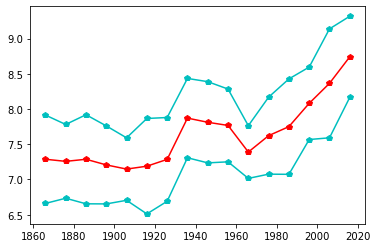

In [60]:
for count, val in enumerate(indeks):
    mean[count]=np.mean(temp[val:val+diff])
    std[count]=np.std(temp[val:val+diff])
    tid_mean[count]=tid[int(val+diff/2)]
    
# plot linjene og punktene 
plt.plot(tid_mean, mean, 'rp', linestyle='-')
plt.plot(tid_mean, mean+std, 'cp', linestyle='-')
plt.plot(tid_mean, mean-std, 'cp', linestyle='-')

## Del 2, oppgave 3
- Bruk den metoden du vil til å dele tidsperioden inn i 16 like lange perioder. 
- Lag en figur som tilsvarer den over

- Gjør det samme igjen, men del perioden inn i 5 like lange perioder. Hva slags informasjon får du fra de forskjellige figurene? Hva er tydligs i den siste figuren vs den første, og motsatt?

### Andre løkker
Det finnes flere løkker enn for-løkker, f.eks. `if-løkker`. Denne oppgaven fokusere ikke på dette, men her er et kort eksempel for å vise hvordan det fungerer:

In [65]:
diff=3
if diff==3:
    print(diff)

3


In [66]:
if diff==4:
    print(diff)
elif diff > 4:
    print(diff)
else:
    print('diff is not equal or larger than 4')

diff is not equal or larger than 4


Vi kan bruke en if-løkke dersom vi f.eks. vil plotte en linje med punkter som skal være røde om det er varmere enn gjennomsnittet, og blå om det er kaldere enn gjennom snittet: 

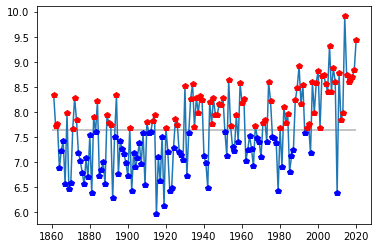

In [67]:
mean=np.mean(temp)

plt.plot(tid, temp)
for count, T in enumerate(temp):
    if T > mean:
        plt.plot(tid[count], T, 'rp')
    elif T < mean:
        plt.plot(tid[count], T, 'bp')

plt.hlines(mean, 1860, 2020, 'k', alpha=.3)
plt.show()

Her kunne man imidlertid også brukt indeksering:

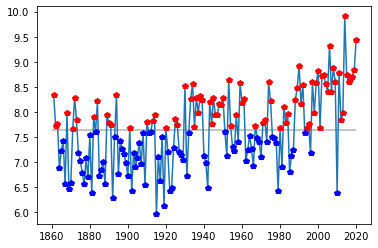

In [68]:
plt.plot(tid, temp)
plt.plot(tid[temp>mean], temp[temp>mean], 'rp')
plt.plot(tid[temp<mean], temp[temp<mean], 'bp')
plt.hlines(mean, 1860, 2020, 'k', alpha=.3)
plt.show()

Slike metoder kan være veldig gode for å vise endringer eller spesielle perioder. Figuren over viser for eksempel tydelig at det har blitt varmere mot slutten av tidsperioden. 

## Del 3: Scatterplot
Tidsserier er ikke den eneste måten å presentere data på! Vi så litt på scatterplots allerede i [Del5_sol_temp_nedbør](https://github.com/irendundas/EkteData/blob/main/NAT624/Del5_sol_temp_nedb%C3%B8r.ipynb), og her ser vi videre på hvordan det kan være hjelpsomt for å undersøke sammenhenger mellom variabler. 

Vi laster inn et nytt datasett: Nedbørsdata.

In [75]:
file='PrecipVestlandYearlyNonan.txt'
precip, tid_p = loadData(file)

file='TempBergenYearlyNonan.txt'
temp,tid_t = loadData(file)

temp=np.squeeze(temp)
precip=np.squeeze(precip)

In [77]:
# undersøk start og slutt til de to tidsseriene
print(tid_p[0])
print(tid_p[-1])
print(tid_t[0])
print(tid_t[-1])

1899.0
2020.0
1899.0
2020.0


In [76]:
# Finn indeksen der tid_t er lik det første året i tid_p
start=np.nonzero(tid_t==tid_p[0]) 
# [0][0] må med for å få tak i kun tallet og ikke alle parantesene rundt
start=start[0][0] 

# Slett starten av temperatur-tidsserien
temp=temp[start:] 
tid_t=tid_t[start:]

1899.0
2020.0
1861.0
2020.0


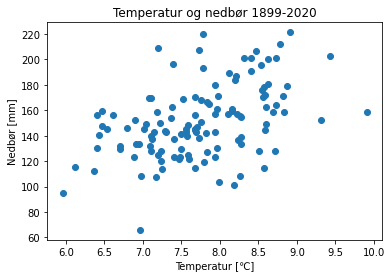

In [71]:
ax=plt.axes()
ax.scatter(temp,precip)
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
) 
plt.show()

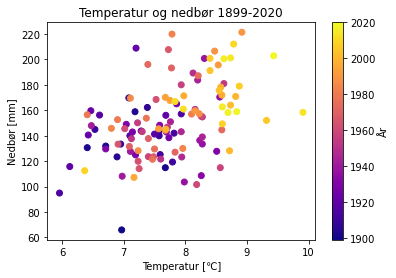

In [72]:
from matplotlib import cm # Denne pakken trengs for å lage fargeskalaen
cmap=cm.get_cmap('plasma',len(temp)) # cmap står for "colormap". Her definerer du hvilken fargeskala du vil bruke. 

colors = tid_t # Her definerer du at fargeskalaen skal basere seg på tidsvektoren din
ax=plt.axes()

# I linjen under plottes precip som en funksjon av temp, fargeskalaen settes til colors (definert rett over), fargekartet settes
# til cmap som du definerte over, og du setter min og makx grenser til fargeksalaen. 
sc=ax.scatter(temp,precip,c=colors,cmap=cmap,vmin=min(tid_t), vmax=max(tid_t)) 
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='Temperatur [\u2103]', # \u2103 er koden for grader celcius. 
) 
plt.colorbar(sc, label='År') # denne linjen gjør at fargeskalaen vises til høyre. 
plt.show()

Bytt om få skriptet over slik at tid er langs x-aksen, temperatur langs y-aksen, og nedbør er fargekodet.

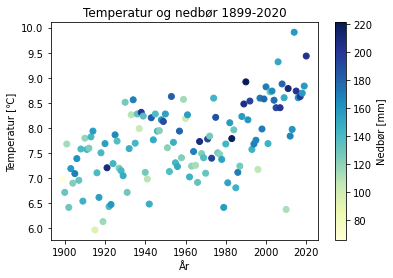

In [73]:
cmap=cm.get_cmap('YlGnBu',len(temp)) # cmap står for "colormap". Her definerer du hvilken fargeskala du vil bruke. 

colors = precip # Her definerer du at fargeskalaen skal basere seg på tidsvektoren din
ax=plt.axes()

# I linjen under plottes precip som en funksjon av temp, fargeskalaen settes til colors (definert rett over), fargekartet settes
# til cmap som du definerte over, og du setter min og makx grenser til fargeksalaen. 
sc=ax.scatter(tid_t,temp,c=colors,cmap=cmap,vmin=min(precip), vmax=max(precip)) 
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Temperatur [\u2103]',
    xlabel='År', # \u2103 er koden for grader celcius. 
) 
plt.colorbar(sc, label='Nedbør [mm]') # denne linjen gjør at fargeskalaen vises til høyre. 
plt.show()

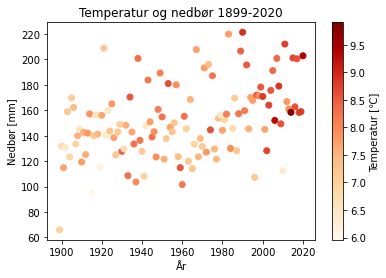

In [74]:
cmap=cm.get_cmap('OrRd',len(temp)) # cmap står for "colormap". Her definerer du hvilken fargeskala du vil bruke. 

colors = temp # Her definerer du at fargeskalaen skal basere seg på tidsvektoren din
ax=plt.axes()

# I linjen under plottes precip som en funksjon av temp, fargeskalaen settes til colors (definert rett over), fargekartet settes
# til cmap som du definerte over, og du setter min og makx grenser til fargeksalaen. 
sc=ax.scatter(tid_t,precip,c=colors,cmap=cmap,vmin=min(temp), vmax=max(temp)) 
ax.set(
    title='Temperatur og nedbør 1899-2020',
    ylabel='Nedbør [mm]',
    xlabel='År', # \u2103 er koden for grader celcius. 
) 
plt.colorbar(sc, label='Temperatur [\u2103]') # denne linjen gjør at fargeskalaen vises til høyre. 
plt.show()